In [402]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


import scipy.stats as stats
from scipy.stats import ttest_ind, norm, chi2_contingency, f_oneway, shapiro, kstest
from sklearn.linear_model import LinearRegression


pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

import warnings
warnings.filterwarnings("ignore")

In [403]:
df = pd.read_csv('files/data-hotel.csv', index_col=0)

In [404]:
df['arrival_date'] =df['arrival_date'].str.replace('2016-2-31', '2016-2-28')
df['arrival_date'] =df['arrival_date'].str.replace('2015-2-29', '2015-2-28')


filas_conteniendo_31 = df[df["reservation_status_date"].str.contains('31', na=False)]
valores_unicos = filas_conteniendo_31["reservation_status_date"].unique()


df['reservation_status_date'] = df['reservation_status_date'].str.replace(r'31$', '28', regex=True)
df['reservation_status_date'] = df['reservation_status_date'].str.replace(r'30$', '28', regex=True)

formato_fecha = "%Y-%m-%d"

try:
    df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format=formato_fecha)
except ValueError as e:
    # Si ocurre un error al convertir la fecha, imprime el mensaje de error
    print("Error al convertir la fecha:", e)

df['arrival_date'] = pd.to_datetime(df['arrival_date'])

In [405]:
#df_canceladas = df[df['is_canceled'] == True]


In [406]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_week_number',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'courtesy',
       'arrival_date'],
      dtype='object')

In [407]:
#df_canceladas['agent'].unique()

In [408]:
df_agentes = df[ (df['agent'] == '9.0') | (df['agent'] == '1.0') ]


In [409]:
canceladas = df[df['is_canceled'] == True]



In [410]:
canceladas.head()

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,courtesy,arrival_date
8,Resort Hotel,True,85,27,0,3,2,0,0,BB,Portugal,Undefined,Undefined,False,0,0,A,A,0,240.0,0,Transient,82.0,0,1,Canceled,2015-05-06,False,2015-07-01
9,Resort Hotel,True,75,27,0,3,2,0,0,HB,Undefined,Undefined,TA/TO,False,0,0,D,D,0,15.0,0,Transient,105.5,0,0,Canceled,2015-04-22,False,2015-07-01
10,Resort Hotel,True,23,27,0,4,2,0,0,BB,Portugal,Undefined,TA/TO,False,0,0,E,E,0,240.0,0,Undefined,123.0,0,0,Canceled,2015-06-23,False,2015-07-01
27,Resort Hotel,True,60,27,2,5,2,0,0,BB,Portugal,Undefined,TA/TO,False,0,0,Undefined,E,0,240.0,0,Undefined,107.0,0,2,Canceled,2015-05-11,False,2015-07-01
32,Resort Hotel,True,96,28,2,8,2,0,0,BB,Portugal,Direct,Direct,False,0,0,E,E,0,Undefined,0,Transient,108.3,0,2,Canceled,2015-05-29,False,2015-07-01


In [411]:
canceladas.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_week_number',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'courtesy',
       'arrival_date'],
      dtype='object')

In [412]:
agrupado_agentes = df[(df['agent'] == '1.0') | (df['agent'] == '9.0')]

In [413]:
agrupado_agentes

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,courtesy,arrival_date
221,Resort Hotel,True,102,28,1,4,2,0,0,BB,Undefined,Undefined,Direct,False,0,0,A,A,0,9.0,0,Transient,66.42,0,1,Canceled,2015-05-28,False,2015-07-08
6908,Resort Hotel,True,7,29,1,1,1,0,0,BB,Portugal,Direct,Direct,False,0,0,Undefined,A,0,9.0,0,Transient,126.00,0,0,Canceled,2016-07-05,False,2016-07-11
7988,Resort Hotel,True,211,37,0,3,1,0,0,BB,Undefined,Groups,Undefined,False,0,0,Undefined,D,0,1.0,0,Transient,89.00,0,0,Canceled,2016-02-09,False,2016-09-07
7989,Resort Hotel,True,211,37,0,3,1,0,0,BB,Portugal,Undefined,TA/TO,False,0,0,D,D,0,1.0,0,Transient,89.00,0,0,Canceled,2016-02-09,False,2016-09-07
7990,Resort Hotel,True,211,37,0,3,1,0,0,BB,Portugal,Undefined,TA/TO,False,0,0,Undefined,D,0,1.0,0,Undefined,89.00,0,0,Canceled,2016-02-09,False,2016-09-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119379,City Hotel,False,109,35,1,3,50,0,0,BB,United Kingdom,Online TA,TA/TO,False,0,0,D,D,0,9.0,0,Undefined,155.00,0,1,Check-Out,2017-04-09,False,2017-08-31
119380,City Hotel,False,44,28,1,3,2,0,0,SC,Undefined,Undefined,TA/TO,False,0,0,A,A,0,9.0,0,Transient,140.75,0,1,Check-Out,2017-04-09,False,2017-08-31
119386,City Hotel,False,102,35,2,5,3,0,0,BB,France,Undefined,TA/TO,False,0,0,E,E,0,9.0,0,Transient,225.43,0,2,Check-Out,2017-07-09,False,2017-08-31
119387,City Hotel,False,34,35,2,5,2,0,0,BB,Undefined,Online TA,TA/TO,False,0,0,Undefined,D,0,9.0,0,Transient,157.71,0,4,Check-Out,2017-07-09,False,2017-08-31


In [414]:
# Assuming the DataFrame is named 'df'
agrupado_agentes['Total_Reservaciones'] = agrupado_agentes.groupby('agent')['is_canceled'].transform('sum')


In [415]:
agrupado_agentes['agent'].unique()

array(['9.0', '1.0'], dtype=object)

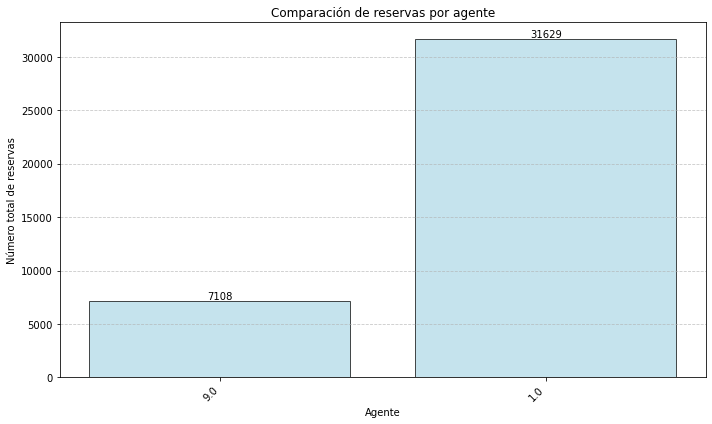

In [416]:

# Extract agent IDs and total reservations
agentes = agrupado_agentes['agent'].unique()
total_reservaciones = agrupado_agentes.groupby('agent')['Total_Reservaciones'].value_counts()

# Create the histogram
plt.figure(figsize=(10, 6))
bar_container = plt.bar(agentes, total_reservaciones, color='lightblue', edgecolor='black', alpha=0.7)

for i, bar in enumerate(bar_container):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'{int(height)}', ha='center', va='bottom')


plt.xlabel('Agente')
plt.ylabel('Número total de reservas')
plt.title('Comparación de reservas por agente')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


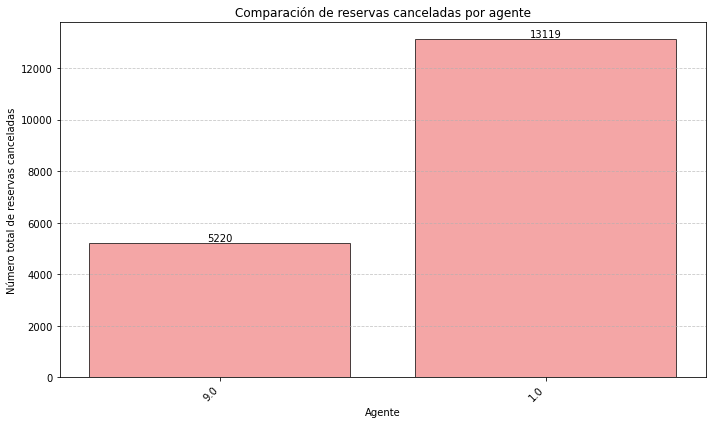

In [417]:

agrupado_agentes_canceladas = agrupado_agentes[agrupado_agentes['is_canceled'] == True]

# Calculate total canceled reservations
agrupado_agentes_canceladas['Total_Reservaciones_Canceladas'] = agrupado_agentes_canceladas.groupby('agent')['is_canceled'].transform('sum')

# Extract agent IDs and total canceled reservations
agentes_canceladas = agrupado_agentes_canceladas['agent'].unique()
total_reservaciones_canceladas = agrupado_agentes_canceladas.groupby('agent')['Total_Reservaciones_Canceladas'].value_counts()

# Create the histogram
plt.figure(figsize=(10, 6))
bar_container = plt.bar(agentes_canceladas, total_reservaciones_canceladas, color='lightcoral', edgecolor='black', alpha=0.7)

# Add labels for each bar
for i, bar in enumerate(bar_container):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'{int(height)}', ha='center', va='bottom')

plt.xlabel('Agente')
plt.ylabel('Número total de reservas canceladas')
plt.title('Comparación de reservas canceladas por agente')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [418]:
agente_nueve = agrupado_agentes[agrupado_agentes['agent'] == '9.0']




In [419]:
agente_nueve['hotel'].unique

<bound method Series.unique of 221       Resort Hotel
6908      Resort Hotel
14377     Resort Hotel
14881     Resort Hotel
14882     Resort Hotel
              ...     
119379      City Hotel
119380      City Hotel
119386      City Hotel
119387      City Hotel
119389      City Hotel
Name: hotel, Length: 31629, dtype: object>

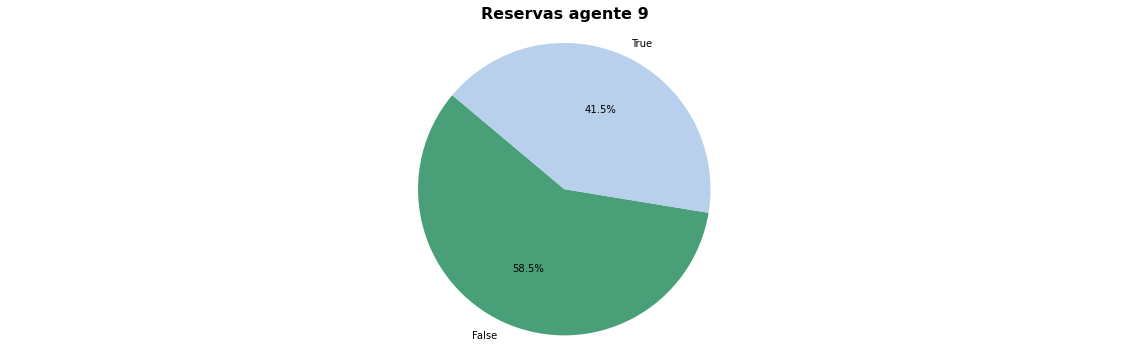

In [420]:
cancelaciones = agente_nueve["is_canceled"].value_counts()

plt.figure(figsize=(20, 6), facecolor='white')

plt.pie(cancelaciones.values, 
        labels=cancelaciones.index, 
        autopct='%1.1f%%', 
        colors=["#49a078", "#b8d0eb"],
        startangle=140)
plt.axis('equal')
plt.title('Reservas agente 9', fontsize = 16, fontweight = "bold");

Un 41,5% de las reservas del agente 9 se cancelan

In [421]:
agente_uno = agrupado_agentes[agrupado_agentes['agent'] == '1.0']


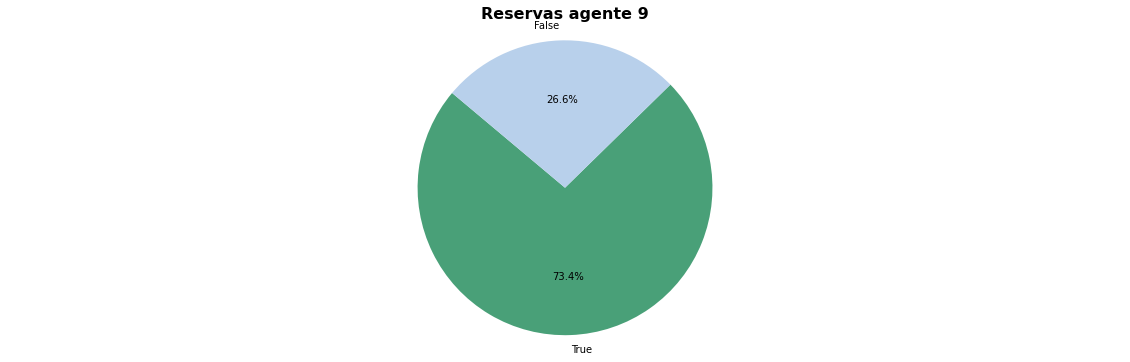

In [422]:
cancelaciones = agente_uno["is_canceled"].value_counts()

plt.figure(figsize=(20, 6), facecolor='white')

plt.pie(cancelaciones.values, 
        labels=cancelaciones.index, 
        autopct='%1.1f%%', 
        colors=["#49a078", "#b8d0eb"],
        startangle=140)
plt.axis('equal')
plt.title('Reservas agente 9', fontsize = 16, fontweight = "bold");

Un 26,6% de las reservas del agente 1 se cancelan. 

In [423]:
agente_nueve_adr_medio = agente_nueve['adr'].mean()
print(f'La tarifa media para el agente NUEVE es: {agente_nueve_adr_medio}')
agente_uno_adr_medio = agente_uno['adr'].mean()
print(f'La tarifa media para el agente UNO es: {agente_uno_adr_medio}')
df_general_adr_medio = df['adr'].mean()
print(f'La tarifa media TOTAL es: {df_general_adr_medio}')


La tarifa media para el agente NUEVE es: 122.53272281766772
La tarifa media para el agente UNO es: 71.48947242543537
La tarifa media TOTAL es: 101.94104689082945


In [424]:
agente_nueve.columns


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_week_number',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'courtesy',
       'arrival_date', 'Total_Reservaciones'],
      dtype='object')

In [425]:
hotel_city_agente_9 = agrupado_agentes[(agrupado_agentes["agent"] == "9.0")& (agrupado_agentes["hotel"] == "City Hotel")]
hotel_city_agente_1= agrupado_agentes[(agrupado_agentes["agent"] == "1.0") & (agrupado_agentes["hotel"] == "City Hotel")]


In [426]:
hotel_city_agente_9['is_canceled'].unique()

array([ True, False])

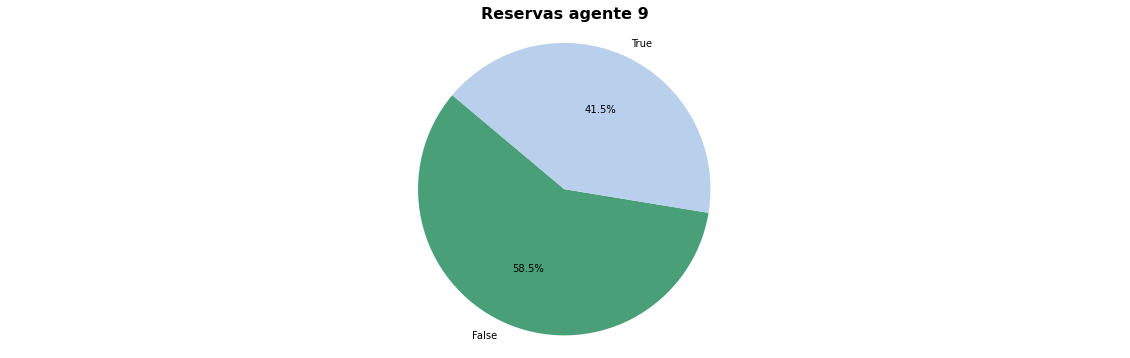

In [427]:
cancelaciones = hotel_city_agente_9["is_canceled"].value_counts()

plt.figure(figsize=(20, 6), facecolor='white')

plt.pie(cancelaciones.values, 
        labels=cancelaciones.index, 
        autopct='%1.1f%%', 
        colors=["#49a078", "#b8d0eb"],
        startangle=140)
plt.axis('equal')
plt.title('Reservas agente 9', fontsize = 16, fontweight = "bold");

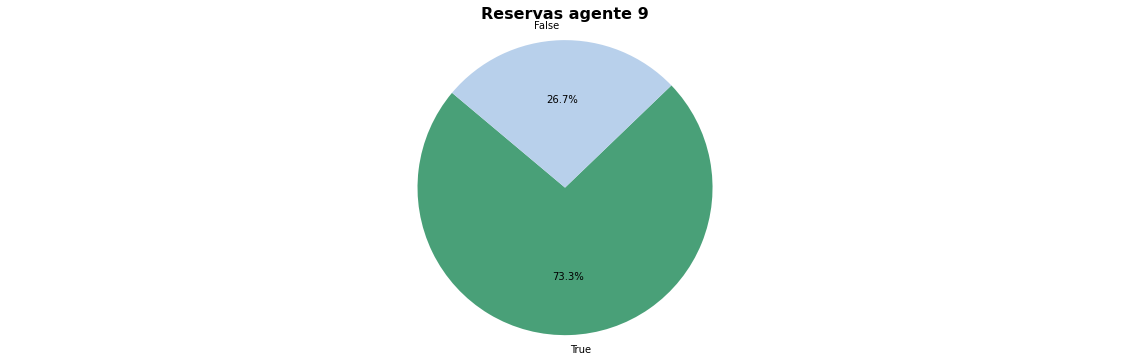

In [428]:
cancelaciones = hotel_city_agente_1["is_canceled"].value_counts()

plt.figure(figsize=(20, 6), facecolor='white')

plt.pie(cancelaciones.values, 
        labels=cancelaciones.index, 
        autopct='%1.1f%%', 
        colors=["#49a078", "#b8d0eb"],
        startangle=140)
plt.axis('equal')
plt.title('Reservas agente 9', fontsize = 16, fontweight = "bold");

La proporción de reservas al hotel city se mantiene para ambos agente respecto al general de reservas.

In [429]:
agente_nueve_adr_medio = hotel_city_agente_9['adr'].mean()
print(f'La tarifa media para el agente NUEVE y HOTEL CITY es: {agente_nueve_adr_medio}')
agente_nueve_adr_medio = hotel_city_agente_1['adr'].mean()
print(f'La tarifa media para el agente UNO Y HOTEL CITYes: {agente_uno_adr_medio}')


La tarifa media para el agente NUEVE y HOTEL CITY es: 122.54311956487408
La tarifa media para el agente UNO Y HOTEL CITYes: 71.48947242543537


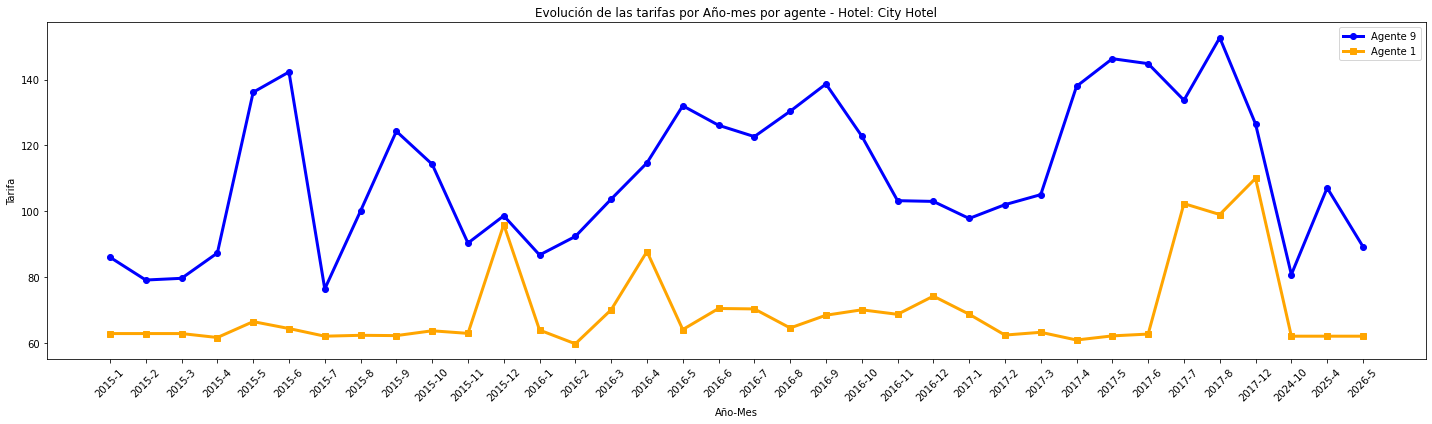

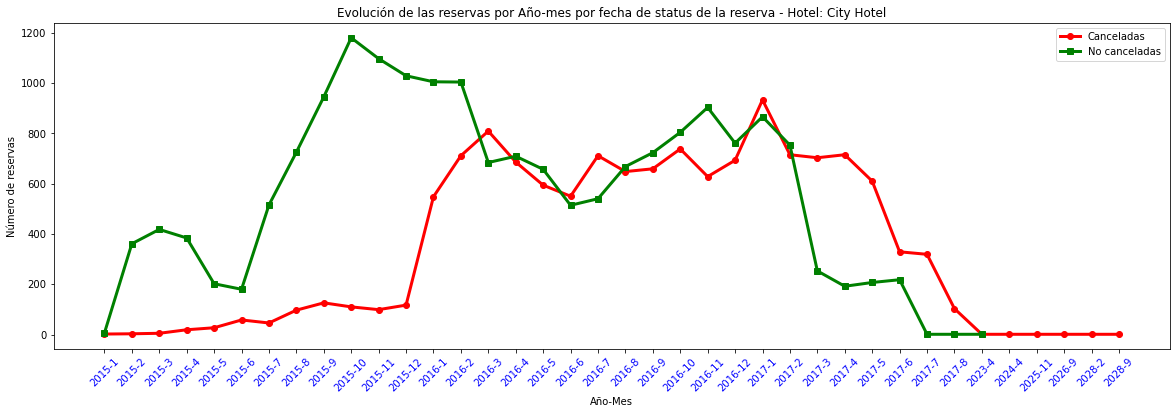

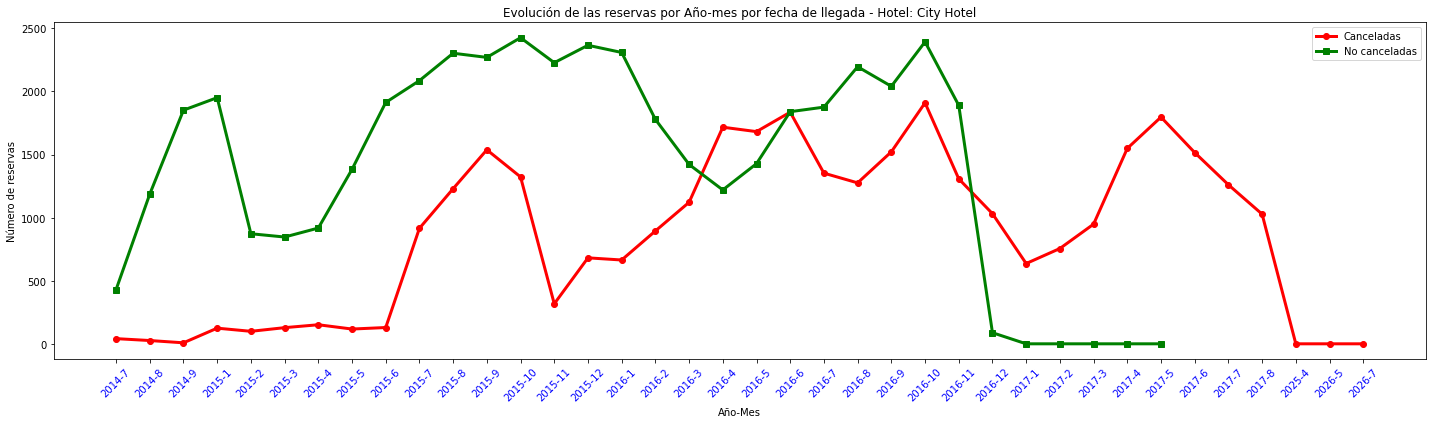

In [430]:

tarifa_agente_9 = hotel_city_agente_9.groupby([df["arrival_date"].dt.year, df["arrival_date"].dt.month])['adr'].mean()
tarifa_agente_1 = hotel_city_agente_1.groupby([df["arrival_date"].dt.year, df["arrival_date"].dt.month])['adr'].mean()

etiquetas_9 = [f'{año}-{mes}' for año, mes in tarifa_agente_9.index]
posiciones_9= list(range(len(etiquetas_9)))

plt.figure(figsize=(20, 6))


tarifa_agente_9.plot(kind='line', marker='o', linestyle='-', color='blue', linewidth=3, label='Agente 9')
# Trazar la línea para is_canceled == False (fecha de llegada)
tarifa_agente_1.plot(kind='line', marker='s', linestyle='-', color='orange', linewidth=3, label='Agente 1')

plt.title('Evolución de las tarifas por Año-mes por agente - Hotel: City Hotel')
plt.xlabel('Año-Mes')
plt.ylabel('Tarifa')

plt.xticks(posiciones_9, etiquetas_9, color="black", fontsize=10, rotation=45)

plt.legend()

plt.tight_layout()
plt.show()

cancelada_status = hotel_city_agente_9[hotel_city_agente_9["is_canceled"] == True].groupby([hotel_city_agente_9["reservation_status_date"].dt.year, hotel_city_agente_9["reservation_status_date"].dt.month])["is_canceled"].count()
no_cancelada_status = hotel_city_agente_9[hotel_city_agente_9["is_canceled"] == False].groupby([hotel_city_agente_9["reservation_status_date"].dt.year, df["reservation_status_date"].dt.month])["is_canceled"].count()

etiquetas_x_status = [f'{año}-{mes}' for año, mes in cancelada_status.index]
posiciones_x_status = list(range(len(etiquetas_x_status)))


plt.figure(figsize=(20, 6))


# Trazar la línea para is_canceled == True (status de reserva)
cancelada_status.plot(kind='line', marker='o', linestyle='-', color='red', linewidth=3, label='Canceladas')
# Trazar la línea para is_canceled == False (status de reserva)
no_cancelada_status.plot(kind='line', marker='s', linestyle='-', color='green', linewidth=3, label='No canceladas')

plt.title('Evolución de las reservas por Año-mes por fecha de status de la reserva - Hotel: City Hotel')
plt.xlabel('Año-Mes')
plt.ylabel('Número de reservas')

plt.xticks(posiciones_x_status, etiquetas_x_status, color="blue", fontsize=10, rotation=45)

plt.legend()

# Segundo conjunto de datos basado en la fecha de llegada y el hotel
cancelada_llegada = df[(df["is_canceled"] == True) & (df["hotel"] == "City Hotel")].groupby([df["arrival_date"].dt.year, df["arrival_date"].dt.month])["is_canceled"].count()
no_cancelada_llegada = df[(df["is_canceled"] == False) & (df["hotel"] == "City Hotel")].groupby([df["arrival_date"].dt.year, df["arrival_date"].dt.month])["is_canceled"].count()

etiquetas_x_llegada = [f'{año}-{mes}' for año, mes in cancelada_llegada.index]
posiciones_x_llegada = list(range(len(etiquetas_x_llegada)))

plt.figure(figsize=(20, 6))

# Trazar la línea para is_canceled == True (fecha de llegada)
cancelada_llegada.plot(kind='line', marker='o', linestyle='-', color='red', linewidth=3, label='Canceladas')
# Trazar la línea para is_canceled == False (fecha de llegada)
no_cancelada_llegada.plot(kind='line', marker='s', linestyle='-', color='green', linewidth=3, label='No canceladas')

plt.title('Evolución de las reservas por Año-mes por fecha de llegada - Hotel: City Hotel')
plt.xlabel('Año-Mes')
plt.ylabel('Número de reservas')

plt.xticks(posiciones_x_llegada, etiquetas_x_llegada, color="blue", fontsize=10, rotation=45)

plt.legend()

plt.tight_layout()
plt.show()

El agente 9 ha ofrecido unas tarifas más elevadas que el agente 1 (except 2015-2) que ofrecían tarifas similares. En peor período para el hotel 2016-02 a fin las tarifas se incrementaron notablemente (except 2016-11 a 2017-3) que fue un período menos grave. 